## Plot the emittance growth rate vs different values of noise.
- The simulation code is ran 3 times to imporve the accuracy, with different seeds of random numbers where they appear (eg ζ at the white noise kick and the initial particle distributions. 
- The emittance growth is averaged ovr turns and the variance is estimated. 



The script is stractured as foolows:
1. Load the data files
2. Plot emittance evolution over turns for different $\Delta$ values, for one run (version)
3. Calculate the emittance growth rate, the fit error and the intercept for each set of parameters (Plot rate vs noise strength vs version)
4. Plot emittance evolution over turns for different $\Delta$ values, for one run (version) along with the fit
5. Plot error vs noise
6. Plot error of the slope vs noise

### test that you have acces to the /afs directory where your data are stored
If permision denied
- $USERNAME@CERN.CH 
- aklog

In [1]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from math import *

### Plotting parameters

In [3]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8.5, 7),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Compute emittance

In [4]:
# #--- <x^2> ---
def mean2(numb):
    return np.mean( (numb - np.mean(numb))**2 )

# #--- <xx'> ---
def mean3(numbx , numbpx):
    return np.mean( (numbx - np.mean(numbx)) * (numbpx - np.mean(numbpx)) )

# #--- sqrt(<x^2> * <px^2> - <xx'>^2) --- compute statistical emittance
def cmp_emit(position, angle):
    return  np.sqrt(mean2(position) * mean2(angle) - mean3(position,angle)**2) # geometrical emittance

### 1. Import the parameters of the study

In [6]:
data = {}
with open('./configuration_files/config_rate_vs_noise.json', "r") as read_file:
        data = json.load(read_file)
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'

### Loop over delta values and the three versions

In [7]:
Deltas_list = np.geomspace(data['Noise']['values_limits']['min'], data['Noise']['values_limits']['max'], data['Noise']['values_limits']['step']) #the real deltas values, as the ones in the names are shorted
versions = [1, 2, 3]

### Loop over studies. Dictionaries to store the emittance values over turns, 1 dictionay for each version, 1 for each value of delta

In [8]:
ex_dictionary = {}
for version in versions:
    ex_dictionary['v{}'.format(version)] = {}
   
    for Delta in Deltas_list:
        print(version, Delta)
        ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] = []
        df = pd.read_pickle(my_afs_path+'Qx62.78_ksi0.005_g0.200_delta{:.3f}_betax115.75_particles15000_turns1000_v{}.pkl'.format(Delta, version))
        for turn in range(data['study_parameters']['turns']):
            ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)].append(cmp_emit(df.at[turn, 'x']/sqrt(data['machine_parameters']['beta_x']), df.at[turn, 'px']*sqrt(data['machine_parameters']['beta_x'] )))

1 0.01
1 0.03162277660168379
1 0.1
1 0.31622776601683794
1 1.0
2 0.01
2 0.03162277660168379
2 0.1
2 0.31622776601683794
2 1.0
3 0.01
3 0.03162277660168379
3 0.1
3 0.31622776601683794
3 1.0


### 2. Plot the geometric emittance evolution over turns 

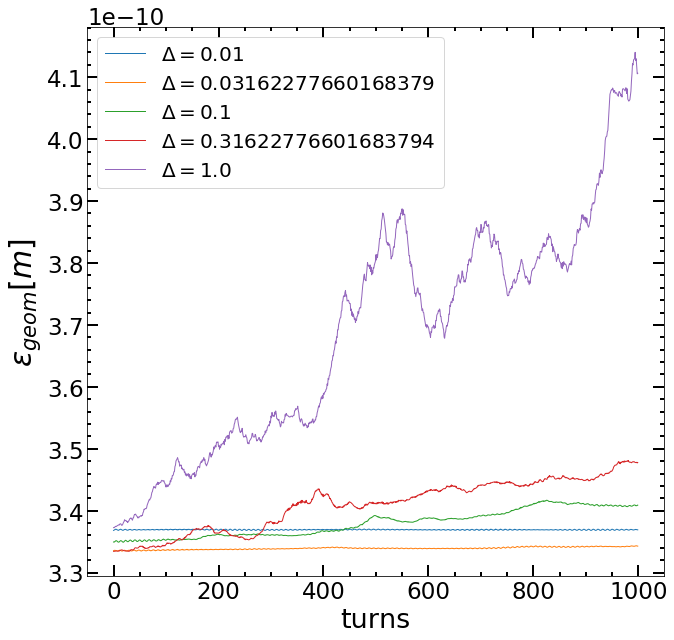

In [17]:
#Delta_test = Deltas_list[3]
version_test = 1
turns_list = np.arange(0, data['study_parameters']['turns'])

fig, ax = plt.subplots(1,1,figsize=(9.5,9))

for Delta_test in Deltas_list:
    ax.plot(turns_list, ex_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)], label = r'$\Delta={}$'.format(Delta_test))
ax.set_xlabel('turns')
ax.set_ylabel(r'$\epsilon_{geom}  [m]$', fontsize = 30)


# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
plt.legend()

#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

savefig = False
if savefig: 
    plt.savefig('./figures/emittance_evolution_Qx62.78_ksi0.005_g0.200_deltaScan_betax115.75_particles15000_turns1000_v{}.png'.format(version_test))#.format(Delta_test))

### Plot rate vs noise strength vs version
- The color code indicate different versions
- Do a linear fit on the emittance values for each value of Delta, to obtain the emittance growth rate.
- The rate for each vale and run/version is also saved for future use

version1, Delta0.01, slope-5.015309021997782e-08, fit_error1.6551033985852576e-08
cov [[ 2.73936726e-16 -1.36831395e-13]
 [-1.36831395e-13  9.11753193e-11]]
version1, Delta0.03162277660168379, slope1.911438190817777e-06, fit_error2.7204887065693256e-08
cov [[ 7.40105880e-16 -3.69682887e-13]
 [-3.69682887e-13  2.46332030e-10]]
version1, Delta0.1, slope2.1548099174925634e-05, fit_error1.710955810710449e-07
cov [[ 2.92736979e-14 -1.46222121e-11]
 [-1.46222121e-11  9.74326732e-09]]
version1, Delta0.31622776601683794, slope4.117534226702015e-05, fit_error3.593114785052927e-07
cov [[ 1.29104739e-13 -6.44878169e-11]
 [-6.44878169e-11  4.29703820e-08]]
version1, Delta1.0, slope0.00018069240879563166, fit_error2.122305498712949e-06
cov [[ 4.50418063e-12 -2.24983822e-09]
 [-2.24983822e-09  1.49914220e-06]]
version2, Delta0.01, slope2.205198852616608e-07, fit_error1.701323708352294e-08
cov [[ 2.89450236e-16 -1.44580393e-13]
 [-1.44580393e-13  9.63387351e-11]]
version2, Delta0.03162277660168379, s

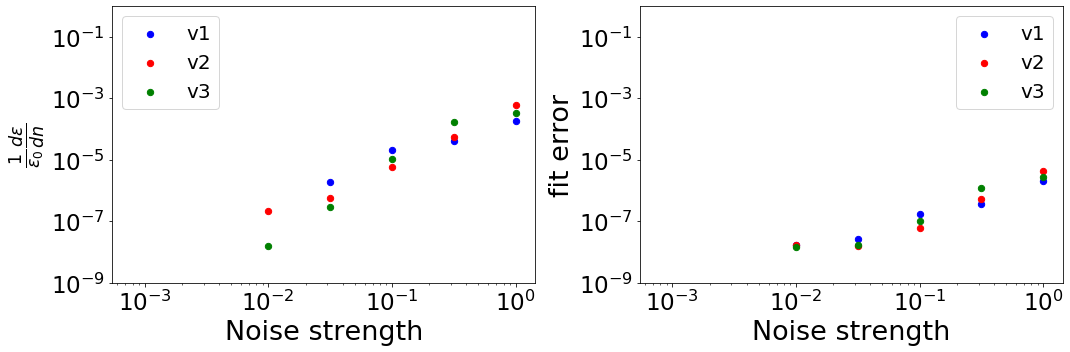

In [43]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
turns_list = np.arange(0, data['study_parameters']['turns'])

colors = ['b', 'r', 'g']
color_pointer = 0

rate_dictionary = {} # this dicitonary stores the emittance growth rate for every noise (Delta) value for each one of the different runs (versions)
intercept_dictionary = {}
fit_error_dictionary= {} # this dicitonary stores the error on the slope of the fit (uncertainty of linear regression) for every noise (Delta) value for each one of the different runs (versions)

for version in versions:
    rate_dictionary['v{}'.format(version)] = {}
    fit_error_dictionary['v{}'.format(version)] = {}
    intercept_dictionary['v{}'.format(version)] = {}
    for Delta in Deltas_list:
        rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] = []
        intercept_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] =[]
        fit_error_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] = []

for version in versions:
    for index, Delta in enumerate(Deltas_list):
        current_study =  ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)][0:]
        # Do the linear fit
        [m_h,b_h], cov_h = np.polyfit(turns_list[0:], current_study/current_study[0], 1, cov= True)
        err_h = np.sqrt(np.diag(cov_h))
        print("version{}, Delta{}, slope{}, fit_error{}".format(version, Delta, m_h, err_h[0]))
        print('cov', cov_h)
        rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)].append(m_h)
        intercept_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)].append(b_h)
        fit_error_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)].append(err_h[0])
        
        if index == 0:
            ax.scatter(Delta, m_h, s=40, c = colors[color_pointer], label = 'v{}'.format(version))
            ax2.scatter(Delta,err_h[0], s=40, c = colors[color_pointer], label = 'v{}'.format(version) )
        else:
            ax.scatter(Delta, m_h, s=40, c = colors[color_pointer])
            ax2.scatter(Delta, err_h[0], s=40, c = colors[color_pointer])
    color_pointer = color_pointer+1
ax.legend()
ax.set_ylim(10e-10, 10e-1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Noise strength')
ax.set_ylabel(r'$\frac{1}{\epsilon_0} \frac{d\epsilon}{dn}$', fontsize = 25)

ax2.set_ylim(10e-10, 10e-1)
ax2.legend()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Noise strength')
ax2.set_ylabel('fit error')
plt.tight_layout()

### Plot evolution of the emittance with the fit

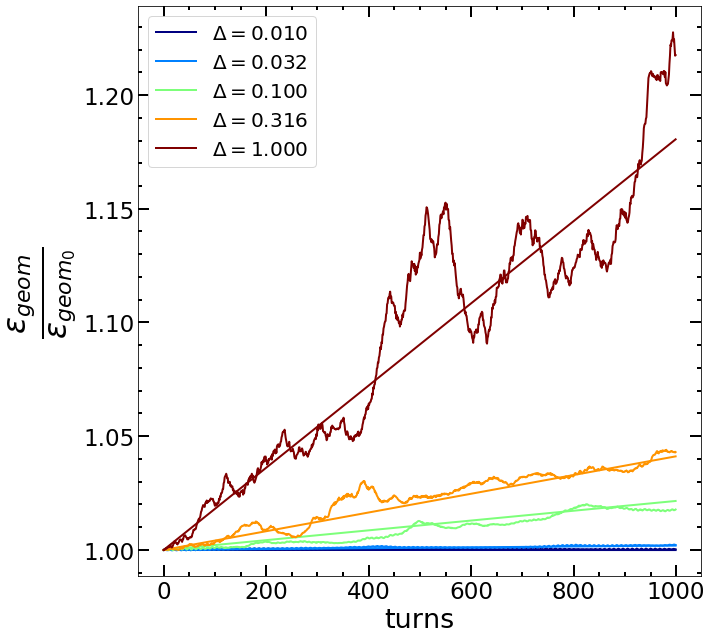

In [44]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(Deltas_list))))

version_test = 1
turns_list = np.arange(0, data['study_parameters']['turns'])
fig, ax = plt.subplots(1,1,figsize=(10,9))

for Delta_test in Deltas_list:
    #fig, ax = plt.subplots() # if you want one combined plot, comment out this line
    c1 = next(colors)
    slope = rate_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)]*turns_list

    ax.plot(turns_list, ex_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)]/ex_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)][0], label = r'$\Delta={:.3f}$'.format(Delta_test), c = c1, linewidth=2)
    ax.plot(turns_list, slope+1., c =c1, linewidth=2)# intercept_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)], c = c1)
    
    
    # if you want one combined plot move the lines below out of the loop
ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon_{geom}}{\epsilon_{geom_0}} $', fontsize = 45)


# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
plt.legend()

#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

savefig = False
if savefig: 
    plt.savefig('./figures/emittance_evolution_fit_Qx62.78_ksi0.005_g0.200_delta{:.3f}_betax115.75_particles15000_turns1000_v{}.png'.format(Delta_test, version_test))#.format(Delta_test))

### Plot growth rate vs noise  + error bars
- each values is the average of the three different runs (versions)
- add error bars, standard error $\sigma_x$ between the three different runs (versions)

\begin{equation}
\sigma_x = \frac{\sigma}{\sqrt{n}}
\end{equation}
, where $\sigma$ is the standard deviation of the population and $n$ the number of observations of the sample

In [ ]:
fig, ax = plt.subplots()
turns_list = np.arange(0, data['study_parameters']['turns'])

theory_rate = []
A = 3.5 # for this case, maybe you should obtain it from by doing the fit yourself. Lebdev P.171

for index, Delta in enumerate(Deltas_list):
    current_version_rate = [] # the rate for this study, you need to store them in a list to calculate the average and the standard deviation
    for version in versions:
           current_version_rate.append(rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)][0])
    # Calculate average and variance
    average_rate = np.mean(current_version_rate)
    standard_error = np.std(current_version_rate)/sqrt(len(versions))
    print(standard_error)
    
    #ax.scatter(Deltas_list_real[index], average_rate , s=40, c = 'r')
    ax.errorbar(Delta, average_rate, yerr=standard_error, c='k', marker ='o', ms =8)
    
    
    theory_rate.append(A*((0.005**2)*((Delta**2))/(2*data['Feedback']['values_limits']['max']**2)))

# Plot theoretical rate
ax.plot(Deltas_list, theory_rate, c = 'k') 
print('theory rate', theory_rate)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Noise')
ax.set_ylabel(r'$\frac{1}{\epsilon_0} \frac{d\epsilon}{dn}$', fontsize = 40)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)


# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')

ax.set_xlim(7e-3, 1+1e-1)    
ax.set_ylim(4e-8, 2e-3)

savefig = False
plt.tight_layout()
if savefig: 
    plt.savefig('./figures/rate_vs_noise_Qx62.78_ksi0.005_g0.200_deltaScan_betax115.75_particles15000_turns1000.png')    
    
    



### Plot error fit vs noise  + error bars
- each values is the average of the three different runs (versions)
- add error bars, standard error $\sigma_x$ between the three different runs (versions)

\begin{equation}
\sigma_x = \frac{\sigma}{\sqrt{n}}
\end{equation}
, where $\sigma$ is the standard deviation of the population and $n$ the number of observations of the sample

6.406908948147031e-10
3.0433031505930742e-09
2.63993763749974e-08
2.234276501871991e-07
4.998438512848201e-07


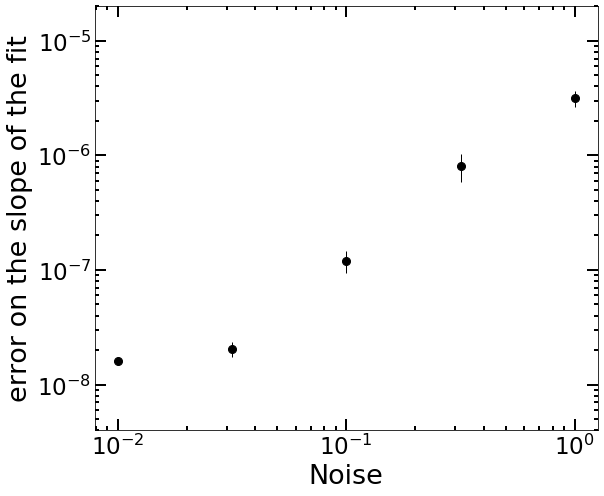

In [47]:
fig, ax = plt.subplots()
turns_list = np.arange(0, data['study_parameters']['turns'])

for index, Delta in enumerate(Deltas_list):
    current_version_error= [] # the rate for this study, you need to store them in a list to calculate the average and the standard deviation
    for version in versions:
           current_version_error.append(fit_error_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)][0])
    # Calculate average and variance, between the three different runs
    average_error = np.sqrt(np.mean(np.array(current_version_error)**2)) # error propagation
    standard_error = np.std(current_version_error)/sqrt(len(versions)) # standard error between the three different runs
    print(standard_error)
    
    #ax.scatter(Deltas_list_real[index], average_rate , s=40, c = 'r')
    ax.errorbar(Delta, average_error, yerr=standard_error, c='k', marker ='o', ms =8)

    
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Noise')
ax.set_ylabel('error on the slope of the fit')

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)


# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
    
#ax.set_xlim(7e-3, 1.05)    
ax.set_ylim(4e-9, 2e-3)

savefig = False
plt.tight_layout()
if savefig:
    plt.savefig('./figures/fit_error_vs_noise_Qx62.78_ksi0.005_g0.200_deltaScan_betax115.75_particles15000_turns1000_ylimON.png')